In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [135]:
data = {
    'Random Walk': np.load('results/random-walk_eval2/eval_results.npy', allow_pickle=True).item(),
    'PPO': np.load('results/ppo_big2_seed=0/eval_results.npy', allow_pickle=True).item(),
    'Station Seeker': np.load('results/station-seeker_eval2/eval_results.npy', allow_pickle=True).item(),
    'Perciatelli': np.load('results/perciatelli_eval2/eval_results.npy', allow_pickle=True).item(),
}
training_rewards = {
    'PPO': np.load('results/ppo_big2_seed=0/train_rewards.npy', allow_pickle=True),
}

In [136]:
colors = {
    'Random Walk': 'tab:purple',
    'PPO': 'tab:orange',
    'Station Seeker': 'tab:blue',
    'Perciatelli': 'tab:red'
}

In [23]:
def fix_attrdict(path, item=True):
    x = np.load(path, allow_pickle=True)
    if item: x = x.item()
    x['config'] = dict(**x['config'])
    np.save(path, x)

#fix_attrdict('results/ppo_big1_seed=0/eval_results.npy')
#fix_attrdict('results/perciatelli_eval2/eval_results.npy')
#fix_attrdict('results/station-seeker_eval2/eval_results.npy')
#fix_attrdict('results/random-walk_eval2/eval_results.npy')
#fix_attrdict('results/ppo_big2_seed=0/eval_results.npy')

c:\Users\jwatr\Desktop\balloon\.venv\lib\site-packages\gym\envs\registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(


# PPO Training Curve

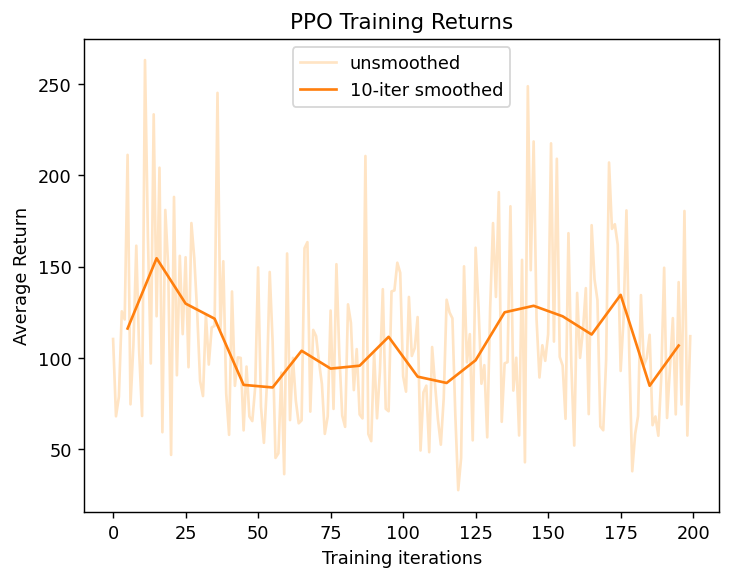

In [19]:
ep_returns = training_rewards['PPO'].reshape(200, 5)
ep_returns_by_iter = ep_returns.mean(axis=1)
ep_returns_by_iter10 = ep_returns_by_iter.reshape(-1, 10).mean(axis=1)
plt.figure(dpi=128)
plt.plot(range(len(ep_returns_by_iter)), ep_returns_by_iter, label='unsmoothed', color='bisque')
plt.plot(range(5,5+len(ep_returns_by_iter10)*10,10), ep_returns_by_iter10, label='10-iter smoothed', color=colors['PPO'])
plt.title('PPO Training Returns')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

# TWR50 bar plot

In [153]:
twr50 = {
    k: v['twr50'] for k, v in data.items()
}
twr50_2 = {
    k: (np.linalg.norm(v['balloon_state'][...,:2], axis=-1) <= 50.0).mean() for k, v in data.items()
}
print(twr50)
print(twr50_2)

{'Random Walk': 0.044167533818938606, 'PPO': 0.04058792924037461, 'Station Seeker': 0.30840790842872007, 'Perciatelli': 0.3384079084287201}
{'Random Walk': 0.044208333333333336, 'PPO': 0.040630208333333334, 'Station Seeker': 0.308484375, 'Perciatelli': 0.3385052083333333}


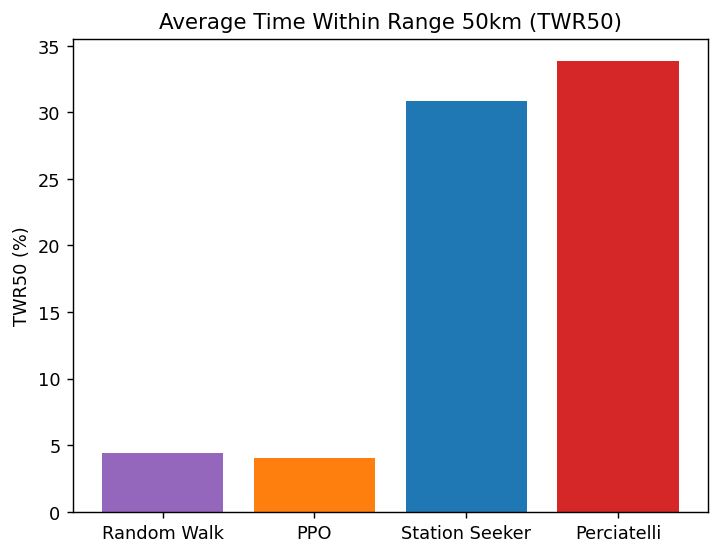

In [154]:
plt.figure(dpi=128)
plt.bar(twr50.keys(), [v*100 for v in twr50.values()], color=colors.values())
plt.title('Average Time Within Range 50km (TWR50)')
plt.ylabel('TWR50 (%)')
plt.show()

# Power plot

[809.30581868 657.11175336 522.615      ... 551.1        481.47
 361.2       ]
[541.915      532.41546949 375.10916531 ... 562.10581948 593.98785121
 503.625     ]
[866.60908918 988.65912628 778.04815048 ... 396.60845332 396.83929696
 378.91330482]
[355.18       408.675      551.1        ... 361.2        826.61819393
 962.00674137]


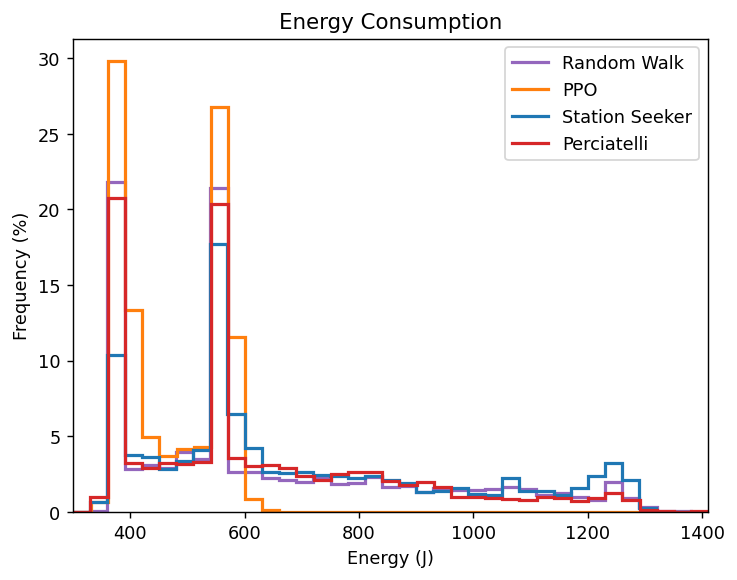

In [141]:
steps_3hr = 3 * 60 // 3  # 3 hrs * 60 mins/hr / 3 mins/step = 60 steps
min_energy, max_energy, bin_size = 300, 1410, 30

plt.figure(dpi=128)
for method, _data in data.items():
    power_load = _data['balloon_state'][...,2].flatten()
    # Partition into 3-hr parts and take mean
    power_load = power_load.reshape(-1, steps_3hr).mean(-1)
    # Scale by 3 hrs to convert power to energy
    energy = 3 * power_load
    print(energy)
    # Compute bin counts
    bins_counts = np.array([((energy >= edge) & (energy < edge+bin_size)).sum() for edge in range(min_energy, max_energy, bin_size)])
    bin_percents = 100 * bins_counts / len(energy)
    # Get edge positions (+rand just makes it look nicer visually)
    edges = np.arange(min_energy, max_energy+1, bin_size) + np.random.random()*(max_energy-min_energy)*0.001
    edges[0], edges[-1] = min_energy, max_energy
    plt.stairs(bin_percents, edges=edges,
               linewidth=1.8, label=method, color=colors[method])
plt.title('Energy Consumption')
plt.xlabel('Energy (J)')
plt.ylabel('Frequency (%)')
plt.xlim(min_energy, max_energy)
#plt.yticks(ticks=[0,7])
plt.legend()
plt.show()

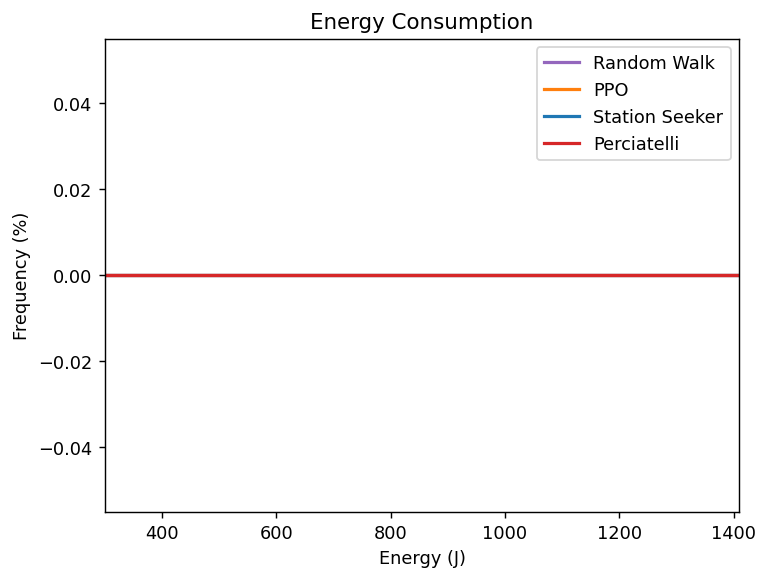

In [142]:
steps_3hr = 3 * 60 // 3  # 3 hrs * 60 mins/hr / 3 mins/step = 60 steps
min_energy, max_energy, bin_size = 300, 1410, 30

plt.figure(dpi=128)
for method, _data in data.items():
    power_load = _data['balloon_state'][...,2].flatten()
    # Partition into 3-hr parts and take mean
    power_load = power_load.reshape(-1, steps_3hr).mean(-1)
    # Scale by 3 hrs to convert power to energy
    energy = 3*60*60 * power_load
    # Compute bin counts
    bins_counts = np.array([((energy >= edge) & (energy < edge+bin_size)).sum() for edge in range(min_energy, max_energy, bin_size)])

    interms = 0.5 * (bins_counts[1:] + bins_counts[:-1])
    plt.plot(range(min_energy, max_energy+1, bin_size),
             np.array([bins_counts[0]] + list(interms) + [bins_counts[-1]]) * 100 / len(energy),
             linewidth=1.8, label=method, color=colors[method])
plt.title('Energy Consumption')
plt.xlabel('Energy (J)')
plt.ylabel('Frequency (%)')
plt.xlim(min_energy, max_energy)
#plt.yticks(ticks=[0,7])
plt.legend()
plt.show()

# Power vs TWR50

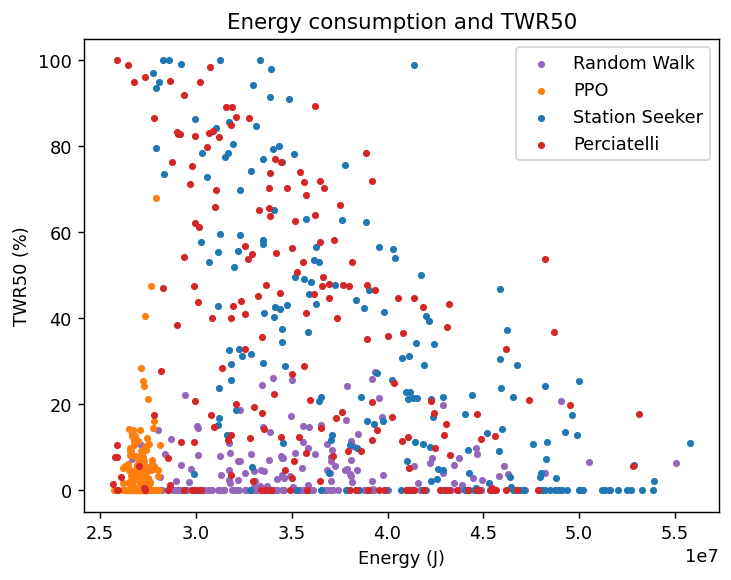

In [143]:
plt.figure(dpi=128)
for method, d in data.items():
    energy = d['balloon_state'][...,2].mean(axis=1) * 48*60*60  # 2 days to seconds
    twr50 = (np.linalg.norm(d['balloon_state'][...,:2], axis=-1) <= 50.0).mean(-1) * 100.0
    plt.scatter(energy, twr50, color=colors[method], label=method, marker='.')
plt.title('Energy consumption and TWR50')
plt.xlabel('Energy (J)')
plt.ylabel('TWR50 (%)')
plt.legend()
plt.show()

# Distance plot

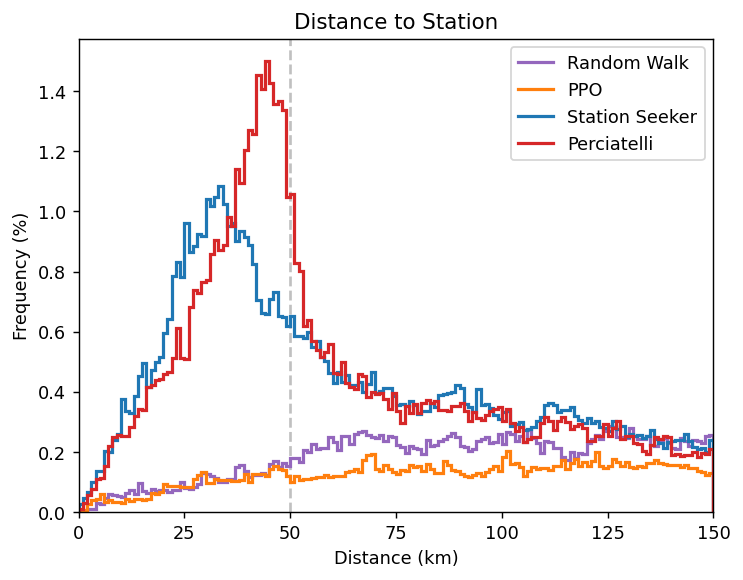

In [144]:
min_dist, max_dist, bin_size = 0, 150, 1

plt.figure(dpi=128)
plt.axvline(50.0, color='silver', linestyle='dashed', zorder=0.0)
for method, _data in data.items():
    dist = np.linalg.norm(_data['balloon_state'][...,:2], axis=-1).flatten()
    # Compute bin counts
    bins_counts = np.array([((dist >= edge) & (dist < edge+bin_size)).sum() for edge in range(min_dist, max_dist, bin_size)])
    bins_percents = 100 * bins_counts / len(dist)
    plt.stairs(bins_percents, edges=range(min_dist, max_dist+1, bin_size),
               linewidth=1.8, label=method, color=colors[method])
plt.title('Distance to Station')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency (%)')
plt.xlim(min_dist, max_dist)
plt.xticks(ticks=range(min_dist,max_dist+1,25))
plt.legend()
plt.show()

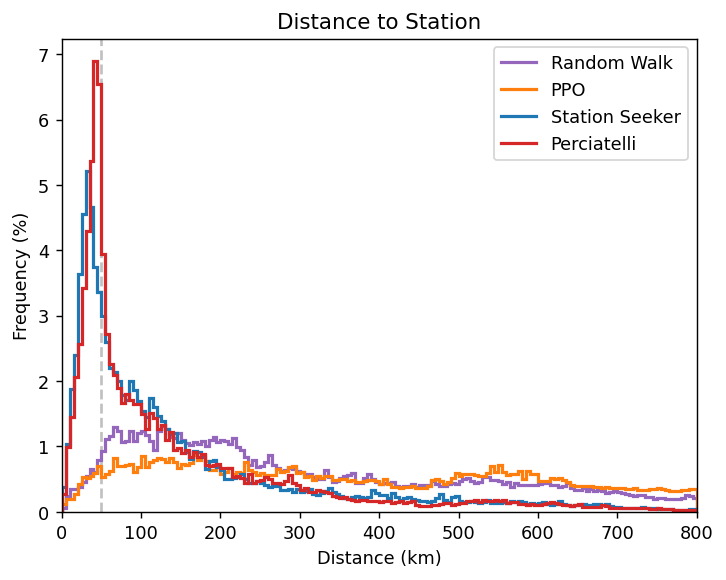

In [145]:
min_dist, max_dist, bin_size = 0, 800, 5

plt.figure(dpi=128)
plt.axvline(50.0, color='silver', linestyle='dashed', zorder=0.0)
for method, _data in data.items():
    dist = np.linalg.norm(_data['balloon_state'][...,:2], axis=-1).flatten()
    # Compute bin counts
    bins_counts = np.array([((dist >= edge) & (dist < edge+bin_size)).sum() for edge in range(min_dist, max_dist, bin_size)])
    bins_percents = 100 * bins_counts / len(dist)
    plt.stairs(bins_percents, edges=range(min_dist, max_dist+1, bin_size),
               linewidth=1.8, label=method, color=colors[method])
plt.title('Distance to Station')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency (%)')
plt.xlim(min_dist, max_dist)
plt.xticks(ticks=range(min_dist,max_dist+1,100))
plt.legend()
plt.show()

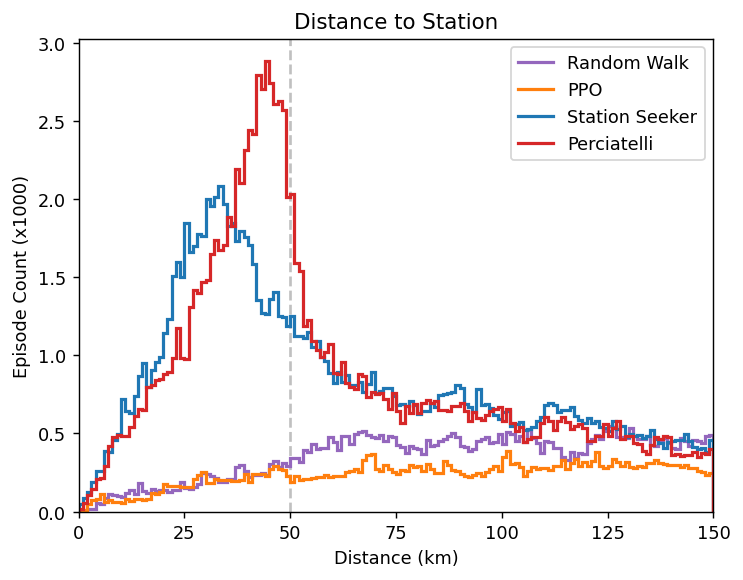

In [151]:
min_dist, max_dist, bin_size = 0, 150, 1

plt.figure(dpi=128)
plt.axvline(50.0, color='silver', linestyle='dashed', zorder=0.0)
for method, _data in data.items():
    dist = np.linalg.norm(_data['balloon_state'][...,:2], axis=-1).flatten()
    # Compute bin counts
    bins_counts = np.array([((dist >= edge) & (dist < edge+bin_size)).sum() for edge in range(min_dist, max_dist, bin_size)])
    bins_percents = 100 * bins_counts / len(dist)
    plt.stairs(bins_counts/1000.0, edges=range(min_dist, max_dist+1, bin_size),
               linewidth=1.8, label=method, color=colors[method])
plt.title('Distance to Station')
plt.xlabel('Distance (km)')
plt.ylabel('Episode Count (x1000)')
plt.xlim(min_dist, max_dist)
plt.xticks(ticks=range(min_dist,max_dist+1,25))
plt.legend()
plt.show()

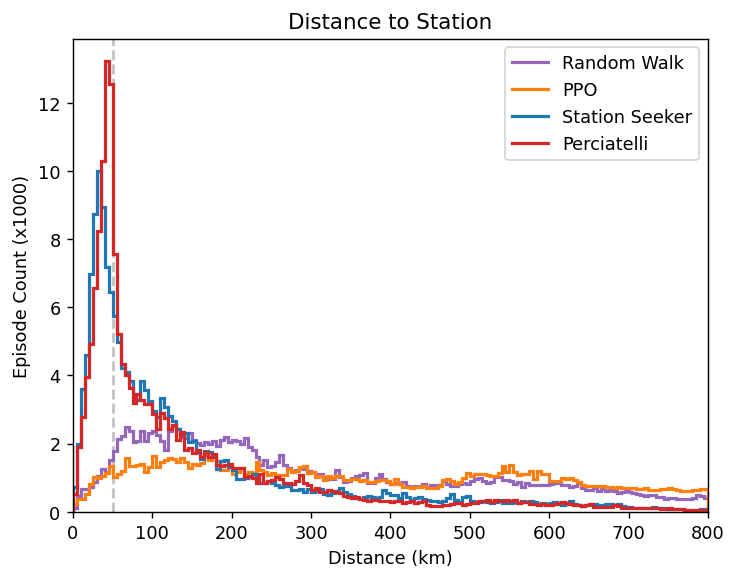

In [157]:
min_dist, max_dist, bin_size = 0, 800, 5

plt.figure(dpi=128)
plt.axvline(50.0, color='silver', linestyle='dashed', zorder=0.0)
for method, _data in data.items():
    dist = np.linalg.norm(_data['balloon_state'][...,:2], axis=-1).flatten()
    # Compute bin counts
    bins_counts = np.array([((dist >= edge) & (dist < edge+bin_size)).sum() for edge in range(min_dist, max_dist, bin_size)])
    bins_percents = 100 * bins_counts / len(dist)
    plt.stairs(bins_counts/1000.0, edges=range(min_dist, max_dist+1, bin_size),
               linewidth=1.8, label=method, color=colors[method])
plt.title('Distance to Station')
plt.xlabel('Distance (km)')
plt.ylabel('Episode Count (x1000)')
plt.xlim(min_dist, max_dist)
plt.xticks(ticks=range(min_dist,max_dist+1,100))
plt.legend()
plt.show()

# Trajectories

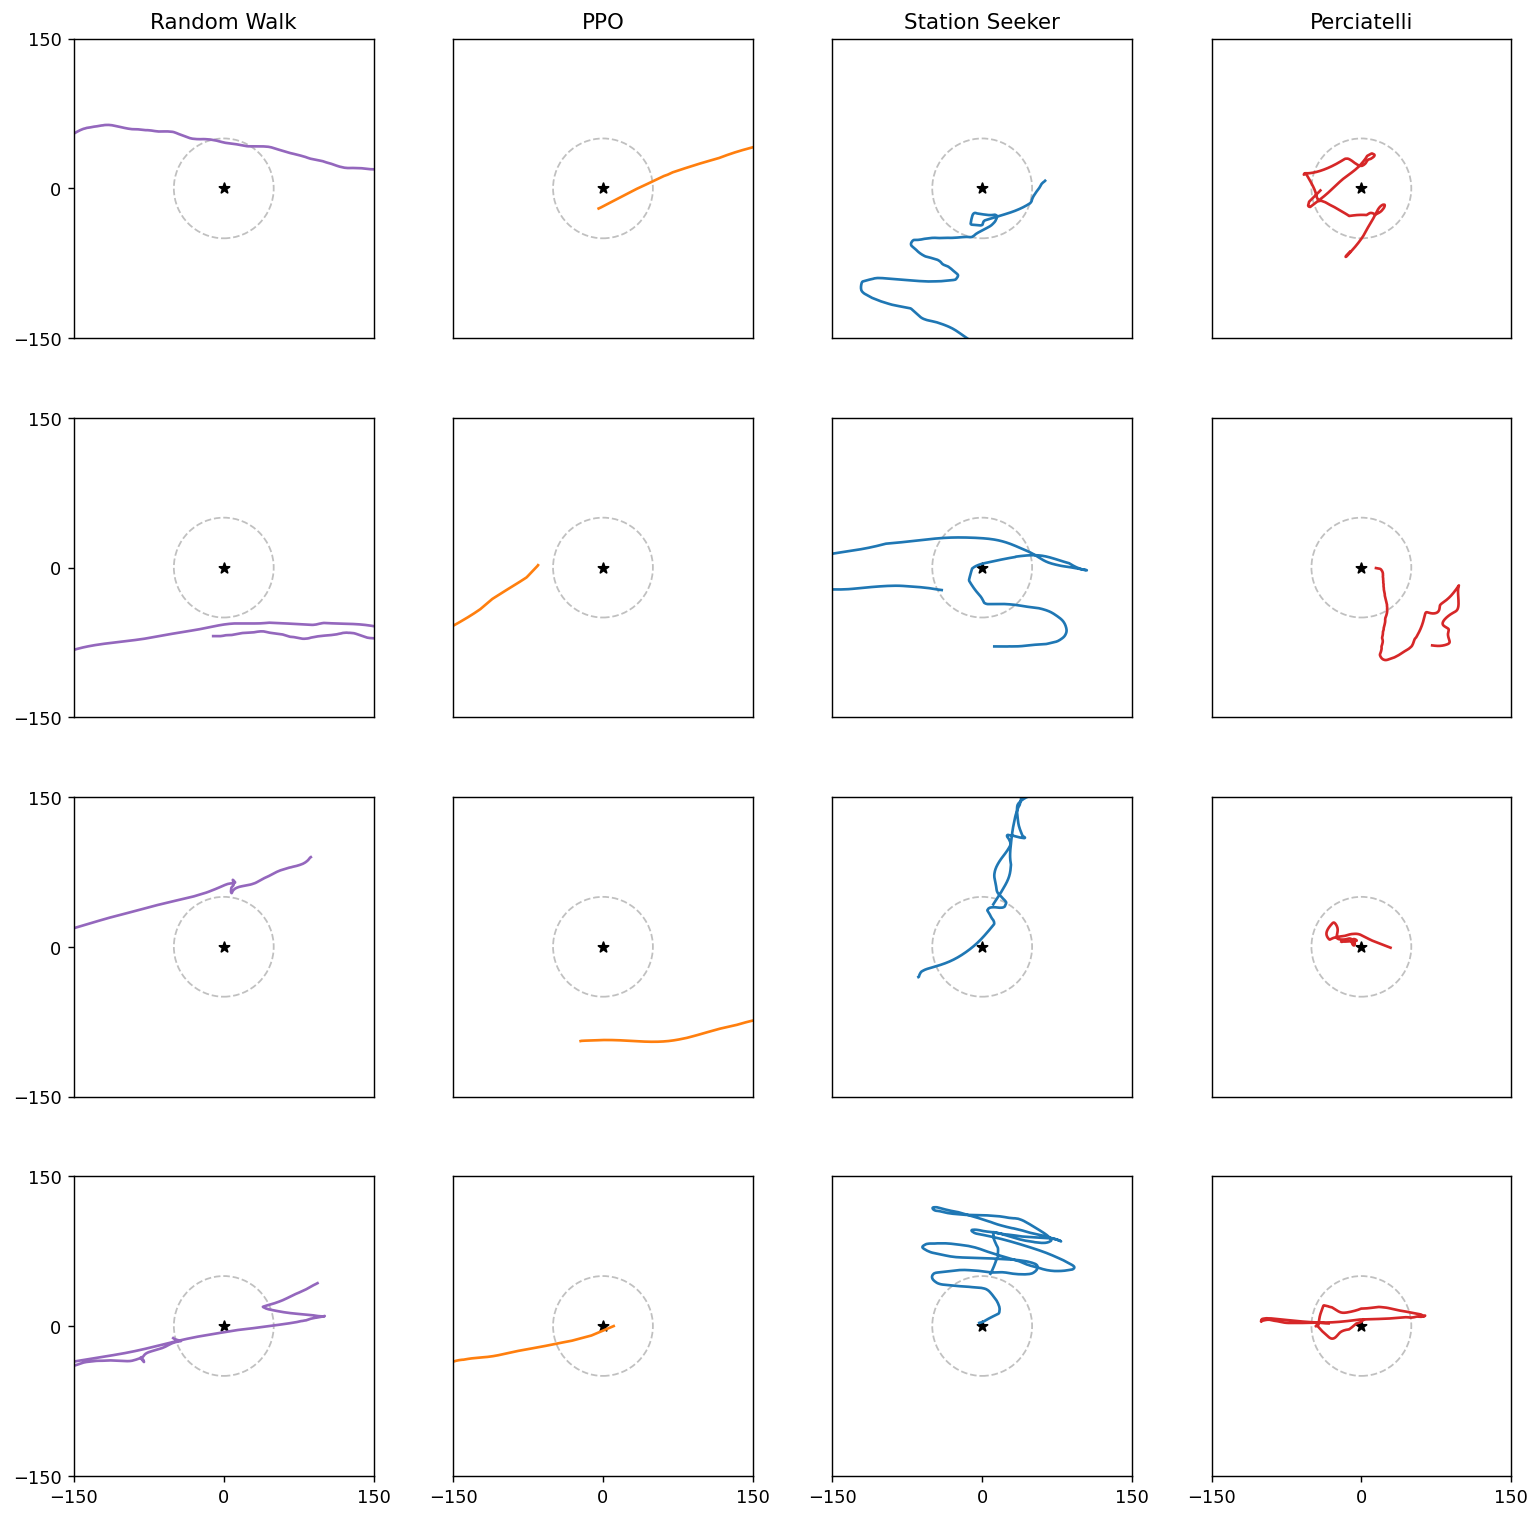

In [146]:
area_size = 150
samples_offset = 9
nrows = 4
fig, axs = plt.subplots(nrows=nrows, ncols=len(data), dpi=128, figsize=(len(data)*3,nrows*3), squeeze=False)
fig.tight_layout()
for i, (method, d) in enumerate(data.items()):
    trajs = d['balloon_state'][...,:2]
    for j, traj in enumerate(trajs[samples_offset:samples_offset+len(axs)]):
        axs[j][i].plot(traj[:,0], traj[:,1], color=colors[method])
        axs[j][i].set_aspect('equal')
        axs[j][i].set_xticks(ticks=([-area_size,0,area_size] if j==nrows-1 else []))
        axs[j][i].set_yticks(ticks=([-area_size,0,area_size] if i==0 else []))
        axs[j][i].set_xlim(-area_size, area_size)
        axs[j][i].set_ylim(-area_size, area_size)
        axs[j][i].scatter([0], [0], color='black', zorder=0.0, marker='*')
        axs[j][i].add_patch(plt.Circle((0,0), 50, fill=False, edgecolor='silver', linestyle='dashed', zorder=0.0))
        if j == 0:
            axs[j][i].set_title(method)

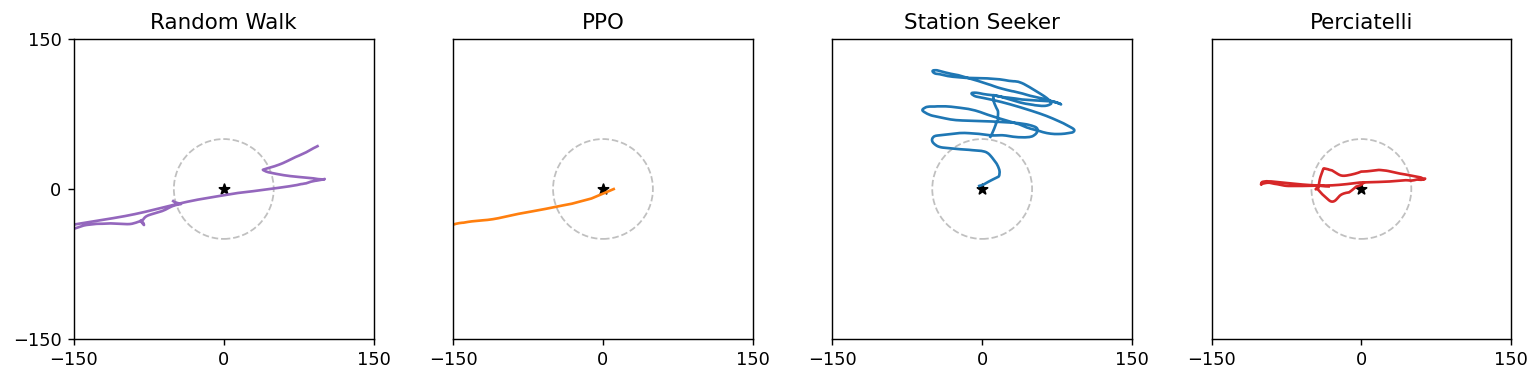

In [147]:
area_size = 150
samples_offset = 12
nrows = 1
fig, axs = plt.subplots(nrows=nrows, ncols=len(data), dpi=128, figsize=(len(data)*3,nrows*3), squeeze=False)
fig.tight_layout()
for i, (method, d) in enumerate(data.items()):
    trajs = d['balloon_state'][...,:2]
    for j, traj in enumerate(trajs[samples_offset:samples_offset+nrows]):
        axs[j][i].plot(traj[:,0], traj[:,1], color=colors[method])
        axs[j][i].set_aspect('equal')
        axs[j][i].set_xticks(ticks=([-area_size,0,area_size] if j==nrows-1 else []))
        axs[j][i].set_yticks(ticks=([-area_size,0,area_size] if i==0 else []))
        axs[j][i].set_xlim(-area_size, area_size)
        axs[j][i].set_ylim(-area_size, area_size)
        axs[j][i].scatter([0], [0], color='black', zorder=0.0, marker='*')
        axs[j][i].add_patch(plt.Circle((0,0), 50, fill=False, edgecolor='silver', linestyle='dashed', zorder=0.0))
        if j == 0:
            axs[j][i].set_title(method)

# Energy Consumed Bar Plot

{'Random Walk': 90.56760023948418, 'PPO': 91.99995088968728, 'Station Seeker': 117.27463520311323, 'Perciatelli': 118.21929915854226}


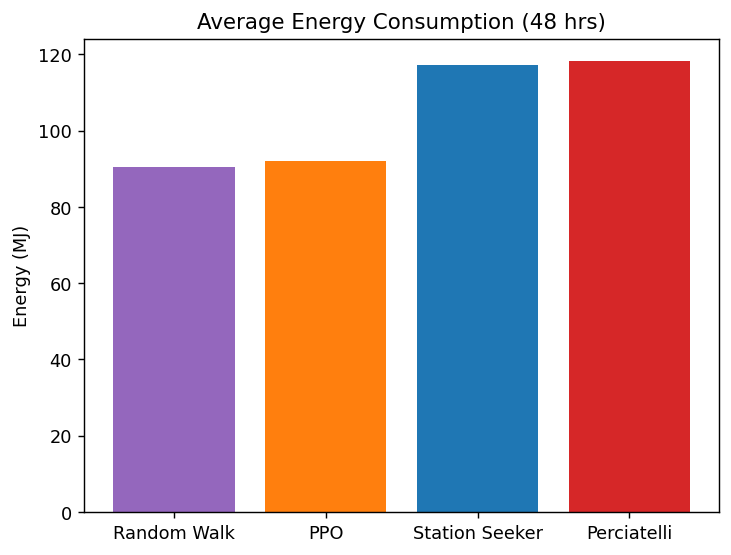

In [166]:
E = {
    k: (v['balloon_state'][2].reshape(-1, 960).mean(-1) * 48*60*60/1000000).mean() for k, v in data.items()
}   
print(E)
plt.figure(dpi=128)
plt.bar(list(E.keys()), list(E.values()), color=colors.values())
plt.title('Average Energy Consumption (48 hrs)')
plt.ylabel('Energy (MJ)')
plt.show()

{'Random Walk': 90.56760023948418, 'PPO': 91.99995088968728, 'Station Seeker': 117.27463520311323, 'Perciatelli': 118.21929915854226}


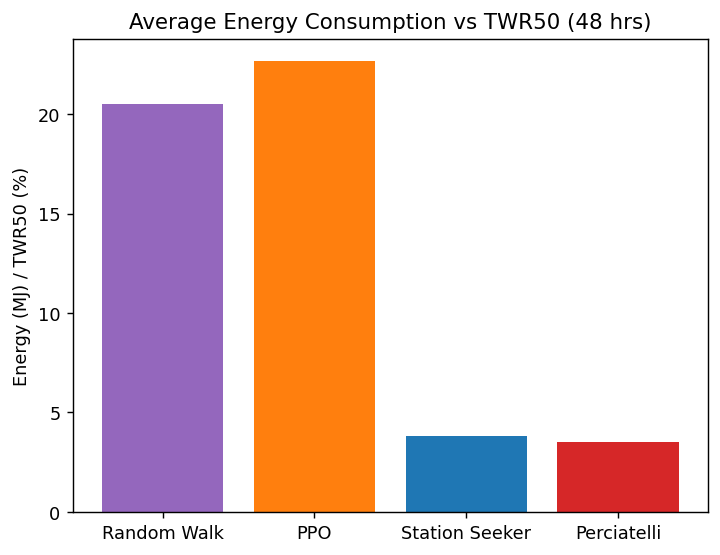

In [167]:
E = {
    k: (v['balloon_state'][2].reshape(-1, 960).mean(-1) * 48*60*60/1000000).mean() for k, v in data.items()
}
print(E)
plt.figure(dpi=128)
plt.bar(list(E.keys()), [e / (t*100) for e, t in zip(E.values(), twr50.values())], color=colors.values())
plt.title('Average Energy Consumption vs TWR50 (48 hrs)')
plt.ylabel('Energy (MJ) / TWR50 (%)')
plt.show()

{'Random Walk': 90.56760023948418, 'PPO': 91.99995088968728, 'Station Seeker': 117.27463520311323, 'Perciatelli': 118.21929915854226}


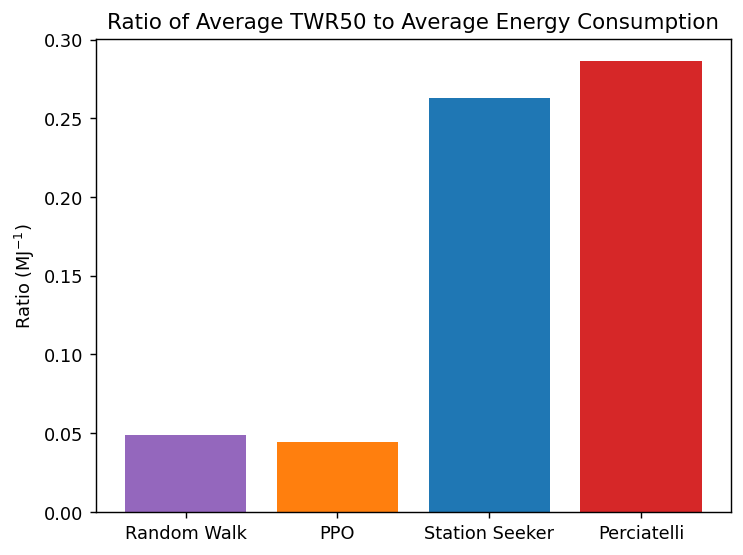

In [170]:
E = {
    k: (v['balloon_state'][2].reshape(-1, 960).mean(-1) * 48*60*60/1000000).mean() for k, v in data.items()
}
print(E)
plt.figure(dpi=128)
plt.bar(list(E.keys()), [(t*100) / e for e, t in zip(E.values(), twr50.values())], color=colors.values())
plt.title('Ratio of Average TWR50 to Average Energy Consumption')
plt.ylabel('Ratio (MJ$^{-1}$)')
plt.show()

In [171]:
print(twr50)

{'Random Walk': 0.044167533818938606, 'PPO': 0.04058792924037461, 'Station Seeker': 0.30840790842872007, 'Perciatelli': 0.3384079084287201}


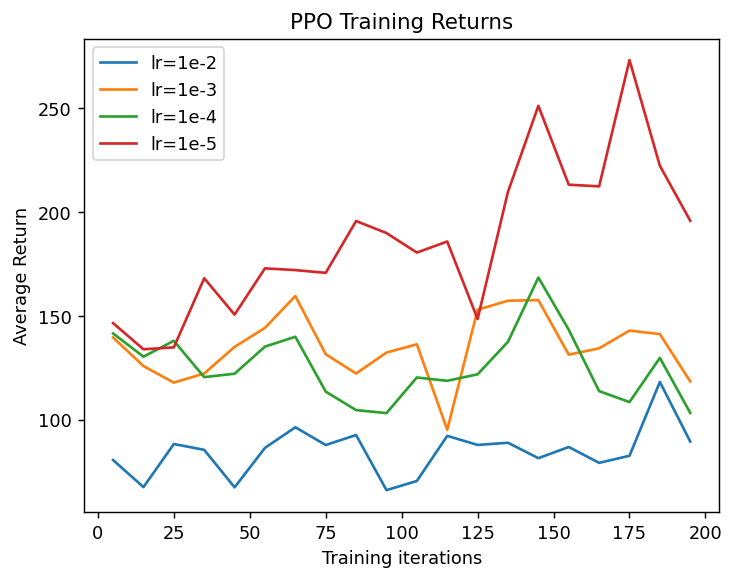

In [173]:
ppo_1en2 = np.load('results/ppo_lr=1e-2/train_rewards.npy')
ppo_1en3 = np.load('results/ppo_lr=1e-3/train_rewards.npy')
ppo_1en4 = np.load('results/ppo_lr=1e-4/train_rewards.npy')
ppo_1en5 = np.load('results/ppo_lr=1e-5/train_rewards.npy')
ep_returns2 = ppo_1en2.reshape(200, 5)
ep_returns3 = ppo_1en3.reshape(200, 5)
ep_returns4 = ppo_1en4.reshape(200, 5)
ep_returns5 = ppo_1en5.reshape(200, 5)
ep_returns_by_iter2 = ep_returns2.mean(axis=1)
ep_returns_by_iter3 = ep_returns3.mean(axis=1)
ep_returns_by_iter4 = ep_returns4.mean(axis=1)
ep_returns_by_iter5 = ep_returns5.mean(axis=1)
ep_returns_by_iter210 = ep_returns_by_iter2.reshape(-1, 10).mean(axis=1)
ep_returns_by_iter310 = ep_returns_by_iter3.reshape(-1, 10).mean(axis=1)
ep_returns_by_iter410 = ep_returns_by_iter4.reshape(-1, 10).mean(axis=1)
ep_returns_by_iter510 = ep_returns_by_iter5.reshape(-1, 10).mean(axis=1)
plt.figure(dpi=128)
#plt.plot(range(len(ep_returns_by_iter)), ep_returns_by_iter, label='unsmoothed', color='bisque')
plt.plot(range(5,5+len(ep_returns_by_iter210)*10,10), ep_returns_by_iter210, label='lr=1e-2')
plt.plot(range(5,5+len(ep_returns_by_iter310)*10,10), ep_returns_by_iter310, label='lr=1e-3')
plt.plot(range(5,5+len(ep_returns_by_iter410)*10,10), ep_returns_by_iter410, label='lr=1e-4')
plt.plot(range(5,5+len(ep_returns_by_iter510)*10,10), ep_returns_by_iter510, label='lr=1e-5')
plt.title('PPO Training Returns')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

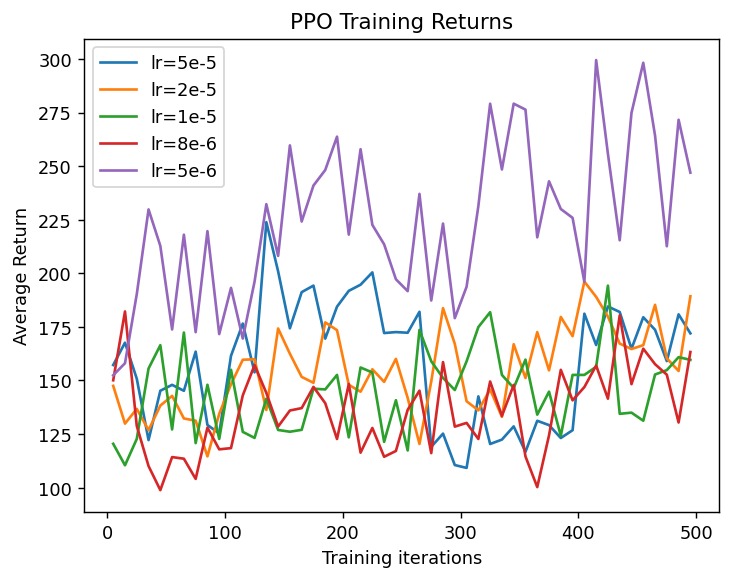

In [181]:
tdata = {
    'lr=5e-5': np.load('results/ppo_lr=5e-5_iters=500/train_rewards.npy', allow_pickle=True),
    'lr=2e-5': np.load('results/ppo_lr=2e-5_iters=500/train_rewards.npy', allow_pickle=True),
    'lr=1e-5': np.load('results/ppo_lr=1e-5_iters=500/train_rewards.npy', allow_pickle=True),
    'lr=8e-6': np.load('results/ppo_lr=8e-6_iters=500/train_rewards.npy', allow_pickle=True),
    'lr=5e-6': np.load('results/ppo_lr=5e-6_iters=500/train_rewards.npy', allow_pickle=True),
}
smoothness = 10
plt.figure(dpi=128)
for k, v in tdata.items():
    ep_returns = v.reshape(500, 5).mean(axis=1)
    ep_returns_smooth = ep_returns.reshape(-1, smoothness).mean(-1)
    s = smoothness
    plt.plot(range(s//2,s//2+len(ep_returns_smooth)*s,s), ep_returns_smooth, label=k)
plt.title('PPO Training Returns')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

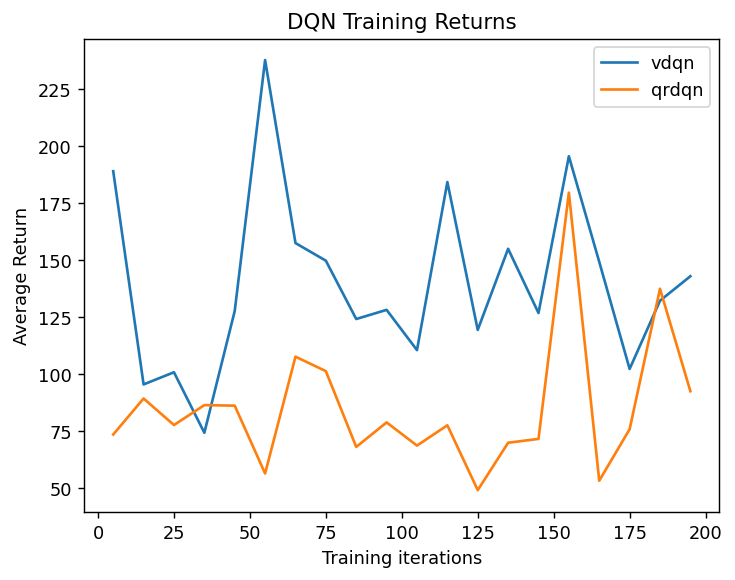

In [5]:
tdata = {
    'vdqn': np.load('results/vdqn_iters=20_epsperiter=10/train_rewards.npy', allow_pickle=True),
    'qrdqn': np.load('results/qrdqn_iters=20_epsperiter=10/train_rewards.npy', allow_pickle=True),
}
smoothness = 10
plt.figure(dpi=128)
for k, v in tdata.items():
    ep_returns = v #.reshape(40, 5).mean(axis=1)
    ep_returns_smooth = ep_returns.reshape(-1, smoothness).mean(-1)
    s = smoothness
    plt.plot(range(s//2,s//2+len(ep_returns_smooth)*s,s), ep_returns_smooth, label=k)
plt.title('DQN Training Returns')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

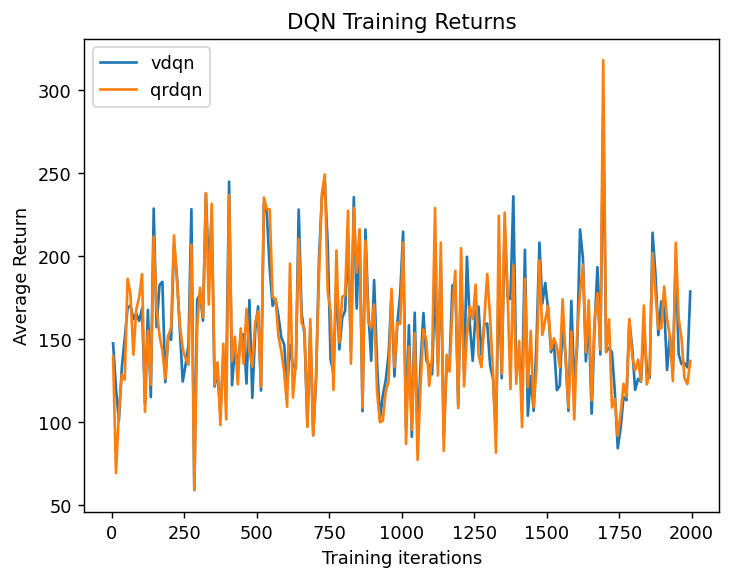

In [6]:
tdata = {
    'vdqn': np.load('results/vdqn_iters=200_epsperiter=10_mpe/train_rewards.npy', allow_pickle=True),
    'qrdqn': np.load('results/qrdqn_iters=200_epsperiter=10_mpe/train_rewards.npy', allow_pickle=True),
}
smoothness = 10
plt.figure(dpi=128)
for k, v in tdata.items():
    ep_returns = v #.reshape(40, 5).mean(axis=1)
    ep_returns_smooth = ep_returns.reshape(-1, smoothness).mean(-1)
    s = smoothness
    plt.plot(range(s//2,s//2+len(ep_returns_smooth)*s,s), ep_returns_smooth, label=k)
plt.title('DQN Training Returns')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

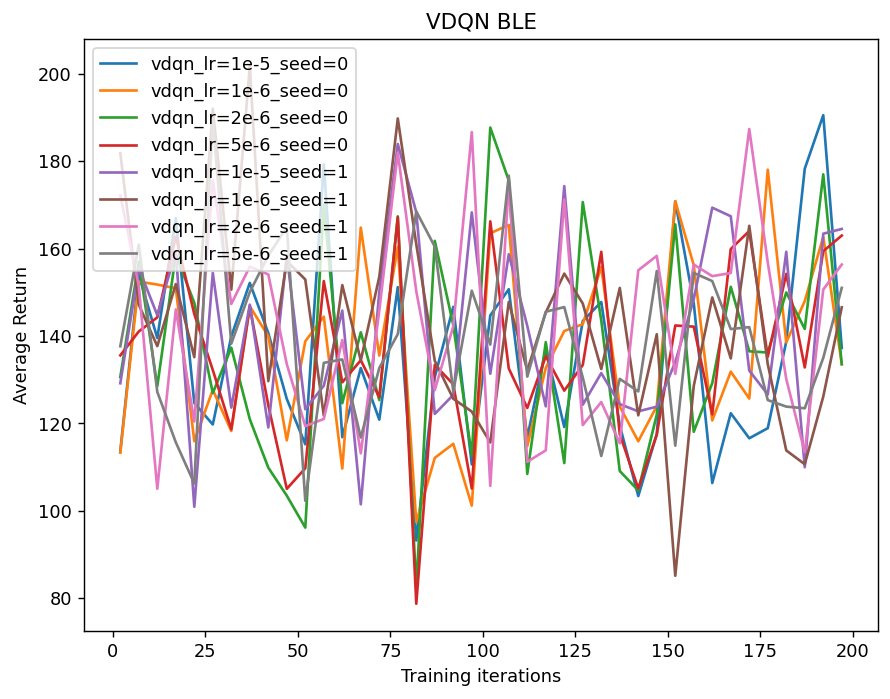

In [59]:
tdata = {
    'vdqn_lr=1e-5_seed=0': np.load('results/vdqn_lr=1e-5_seed=0/train_rewards_200.npy', allow_pickle=True),
    'vdqn_lr=1e-6_seed=0': np.load('results/vdqn_lr=1e-6_seed=0/train_rewards_200.npy', allow_pickle=True),
    'vdqn_lr=2e-6_seed=0': np.load('results/vdqn_lr=2e-6_seed=0/train_rewards_200.npy', allow_pickle=True),
    'vdqn_lr=5e-6_seed=0': np.load('results/vdqn_lr=5e-6_seed=0/train_rewards_200.npy', allow_pickle=True),
    'vdqn_lr=1e-5_seed=1': np.load('results/vdqn_lr=1e-5_seed=1/train_rewards_200.npy', allow_pickle=True),
    'vdqn_lr=1e-6_seed=1': np.load('results/vdqn_lr=1e-6_seed=1/train_rewards_200.npy', allow_pickle=True),
    'vdqn_lr=2e-6_seed=1': np.load('results/vdqn_lr=2e-6_seed=1/train_rewards_200.npy', allow_pickle=True),
    'vdqn_lr=5e-6_seed=1': np.load('results/vdqn_lr=5e-6_seed=1/train_rewards_200.npy', allow_pickle=True),
}
smoothness = 5
plt.figure(dpi=128, figsize=(8,6))
for k, v in tdata.items():
    ep_returns = v.reshape(-1, 5).mean(axis=1)
    ep_returns_smooth = ep_returns.reshape(-1, smoothness).mean(-1)
    s = smoothness
    plt.plot(range(s//2,s//2+len(ep_returns_smooth)*s,s), ep_returns_smooth, label=k)
plt.title('VDQN BLE')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

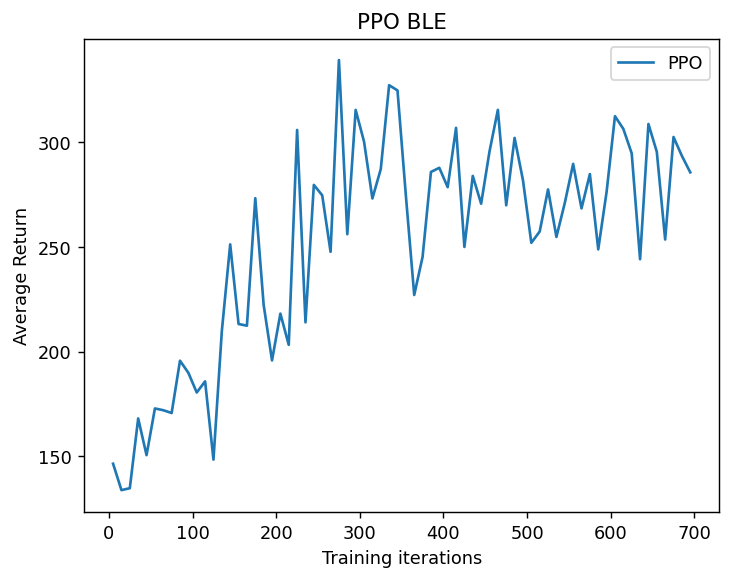

In [18]:
tdata = {
    'PPO': np.concatenate([np.load('results/ppo_lr=1e-5/train_rewards.npy', allow_pickle=True),
                           np.load('results/ppo_lr=1e-5/train_rewards_500.npy', allow_pickle=True),
                           np.load('results/ppo_lr=1e-5/train_rewards_700.npy', allow_pickle=True),
                           np.load('results/ppo_lr=1e-5/train_rewards_1000.npy', allow_pickle=True)]),
}
smoothness = 10
plt.figure(dpi=128)
for k, v in tdata.items():
    ep_returns = v.reshape(-1, 5).mean(axis=1)
    ep_returns_smooth = ep_returns.reshape(-1, smoothness).mean(-1)
    s = smoothness
    plt.plot(range(s//2,s//2+len(ep_returns_smooth)*s,s), ep_returns_smooth, label=k)
plt.title('PPO BLE')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

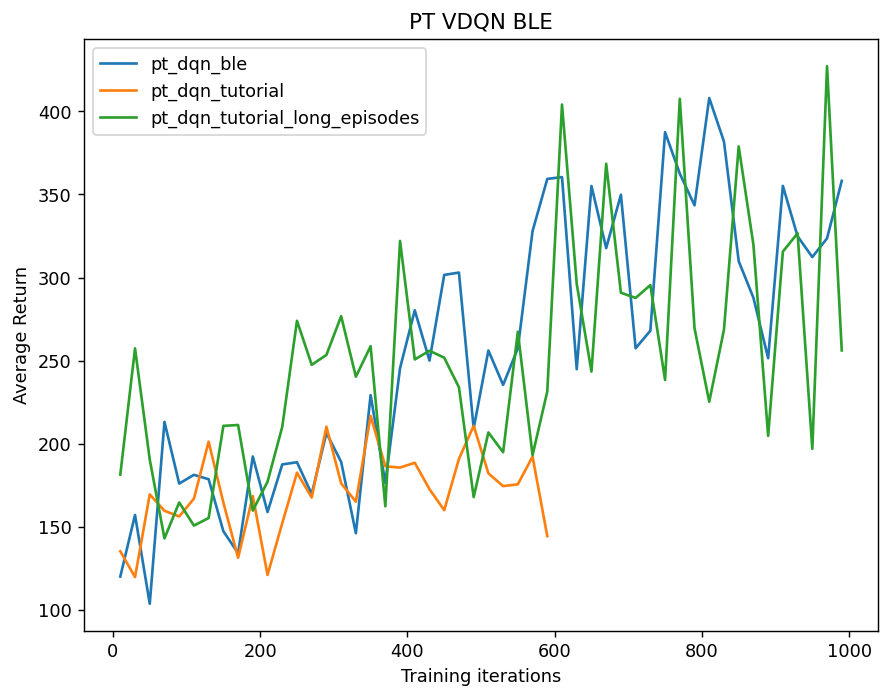

In [65]:
tdata = {
    'pt_dqn_ble': np.load('results/pt_dqn_ours/train_rewards_1000.npy', allow_pickle=True),
    'pt_dqn_tutorial': np.load('results/pt_dqn_original/train_rewards_600.npy', allow_pickle=True),
    'pt_dqn_tutorial_long_episodes': np.load('results/pt_dqn_original_long/train_rewards_1000.npy', allow_pickle=True),
}
smoothness = 20
plt.figure(dpi=128, figsize=(8,6))
for k, v in tdata.items():
    ep_returns = v.reshape(-1, 1).mean(-1)
    ep_returns_smooth = ep_returns.reshape(-1, smoothness).mean(-1)
    s = smoothness
    plt.plot(range(s//2,s//2+len(ep_returns_smooth)*s,s), ep_returns_smooth, label=k)
plt.title('PT VDQN BLE')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()

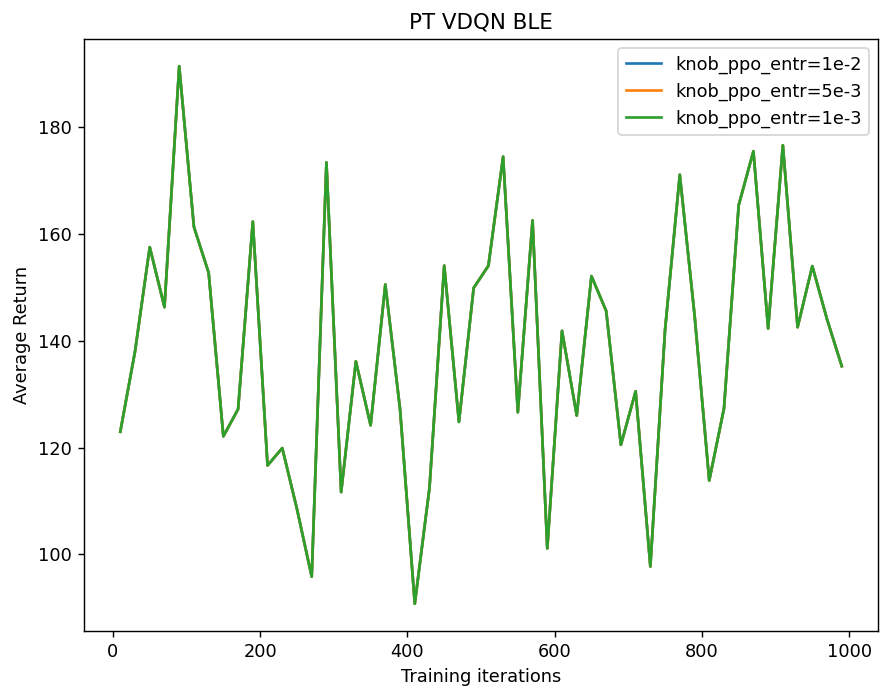

In [67]:
tdata = {
    'knob_ppo_entr=1e-2': np.load('results/knob_ppo_entr=1e-2/train_rewards_200.npy', allow_pickle=True),
    'knob_ppo_entr=5e-3': np.load('results/knob_ppo_entr=5e-3/train_rewards_200.npy', allow_pickle=True),
    'knob_ppo_entr=1e-3': np.load('results/knob_ppo_entr=1e-3/train_rewards_200.npy', allow_pickle=True),
}
smoothness = 20
plt.figure(dpi=128, figsize=(8,6))
for k, v in tdata.items():
    ep_returns = v.reshape(-1, 1).mean(-1)
    ep_returns_smooth = ep_returns.reshape(-1, smoothness).mean(-1)
    s = smoothness
    plt.plot(range(s//2,s//2+len(ep_returns_smooth)*s,s), ep_returns_smooth, label=k)
plt.title('PT VDQN BLE')
plt.xlabel('Training iterations')
plt.ylabel('Average Return')
plt.legend()
plt.show()